In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [4]:
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


In [5]:
url="https://api.openweathermap.org/data/2.5/weather?q="
city_data=[]
print("Beginning Data Retrieval")
print("-----------------------------")
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}"
#         
#     print(city_url)
    
#     Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

#     Add 1 to the record count
    record_count += 1
    try:
         # Parse the JSON and retrieve data
        city_weather =requests.get(city_url).json()

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind =city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

#         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | ola
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | mariehamn
Processing Record 6 of Set 1 | shenkursk
Processing Record 7 of Set 1 | vorgashor
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | villa regina
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | lisala
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | baijiantan
Processing Record 20 of Set 1 | gosaba
City not found. Skipping...
Processing Record 21 of Set 1 | leava
Processin

Processing Record 39 of Set 4 | ust'-kut
Processing Record 40 of Set 4 | saudarkrokur
Processing Record 41 of Set 4 | ayutla de los libres
Processing Record 42 of Set 4 | saipan
Processing Record 43 of Set 4 | arraial do cabo
Processing Record 44 of Set 4 | east london
Processing Record 45 of Set 4 | ataq
Processing Record 46 of Set 4 | aripuana
Processing Record 47 of Set 4 | amos
Processing Record 48 of Set 4 | walvis bay
Processing Record 49 of Set 4 | xiaoweizhai
Processing Record 0 of Set 5 | orchard homes
Processing Record 1 of Set 5 | nikel
Processing Record 2 of Set 5 | acarau
Processing Record 3 of Set 5 | barranca
Processing Record 4 of Set 5 | tisaiyanvilai
Processing Record 5 of Set 5 | kuanda
Processing Record 6 of Set 5 | mount pearl
Processing Record 7 of Set 5 | nosy varika
Processing Record 8 of Set 5 | port hedland
Processing Record 9 of Set 5 | sitka
Processing Record 10 of Set 5 | reggane
Processing Record 11 of Set 5 | kesap
Processing Record 12 of Set 5 | chimbaro

Processing Record 32 of Set 8 | kondopoga
Processing Record 33 of Set 8 | kitami
Processing Record 34 of Set 8 | bria
Processing Record 35 of Set 8 | prigen
Processing Record 36 of Set 8 | ugoofaaru
Processing Record 37 of Set 8 | lachi
Processing Record 38 of Set 8 | bontang
Processing Record 39 of Set 8 | stanisic
Processing Record 40 of Set 8 | jayapura
Processing Record 41 of Set 8 | nabire
Processing Record 42 of Set 8 | port lincoln
Processing Record 43 of Set 8 | las lomitas
Processing Record 44 of Set 8 | polyarnyy
Processing Record 45 of Set 8 | punta arenas
Processing Record 46 of Set 8 | kawm hamadah
Processing Record 47 of Set 8 | lhuentse
Processing Record 48 of Set 8 | korla
Processing Record 49 of Set 8 | aleksandrovsk-sakhalinskiy
Processing Record 0 of Set 9 | tofol
Processing Record 1 of Set 9 | phalaborwa
Processing Record 2 of Set 9 | neiafu
Processing Record 3 of Set 9 | siracusa
Processing Record 4 of Set 9 | ueckermunde
Processing Record 5 of Set 9 | espargos
Cit

Processing Record 23 of Set 12 | tralee
Processing Record 24 of Set 12 | annaba
Processing Record 25 of Set 12 | tippi
Processing Record 26 of Set 12 | merizo village
Processing Record 27 of Set 12 | boguchany
Processing Record 28 of Set 12 | san ignacio
Processing Record 29 of Set 12 | hayma'
City not found. Skipping...
Processing Record 30 of Set 12 | gaspe
Processing Record 31 of Set 12 | churapcha
Processing Record 32 of Set 12 | burang
Processing Record 33 of Set 12 | dapaong
Processing Record 34 of Set 12 | harar
Processing Record 35 of Set 12 | marlow
Processing Record 36 of Set 12 | kagoshima
Processing Record 37 of Set 12 | nyurba
Processing Record 38 of Set 12 | kasane
Processing Record 39 of Set 12 | taoudenni
Processing Record 40 of Set 12 | prince albert
Processing Record 41 of Set 12 | beykonak
Processing Record 42 of Set 12 | bafq
Processing Record 43 of Set 12 | torbat-e jam
Processing Record 44 of Set 12 | sciacca
Processing Record 45 of Set 12 | miles city
Processing 

In [6]:
city_df=pd.DataFrame(city_data)
city_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [7]:
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,277.35,80,77,4.92,CA,1686578888
1,ola,59.5833,151.2833,279.03,95,100,2.79,RU,1686578888
2,blackmans bay,-43.0167,147.3167,283.22,84,99,2.74,AU,1686578600
3,edinburgh of the seven seas,-37.0676,-12.3116,289.86,91,100,15.32,SH,1686578889
4,mariehamn,60.0973,19.9348,290.07,45,0,6.17,AX,1686578889


In [10]:
city_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
city_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,277.35,80,77,4.92,CA,1686578888
1,ola,59.5833,151.2833,279.03,95,100,2.79,RU,1686578888
2,blackmans bay,-43.0167,147.3167,283.22,84,99,2.74,AU,1686578600
3,edinburgh of the seven seas,-37.0676,-12.3116,289.86,91,100,15.32,SH,1686578889
4,mariehamn,60.0973,19.9348,290.07,45,0,6.17,AX,1686578889
...,...,...,...,...,...,...,...,...,...
569,torbat-e jam,35.2440,60.6225,305.66,13,1,9.23,IR,1686579081
570,sciacca,37.5082,13.0881,300.18,59,5,7.68,IT,1686579081
571,miles city,46.4083,-105.8406,289.69,72,0,0.00,US,1686578972


<Axes: title={'center': 'City max lattitude vs Temprature'}, xlabel='Latitude', ylabel='Maximum Temp '>

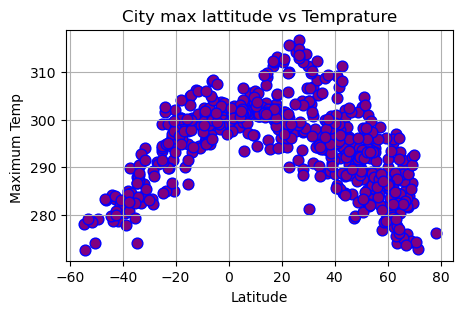

In [12]:
#Lattitude vs temprature scatter plot
city_df.plot.scatter(x="Lat",y="Max Temp",xlabel="Latitude",ylabel="Maximum Temp ",
                     title="City max lattitude vs Temprature",grid=True,c="purple",s=60,
                    edgecolors="blue",figsize=(5,3))

<Axes: title={'center': 'City max lattitude vs Humidity'}, xlabel='Latitude', ylabel='Humidity '>

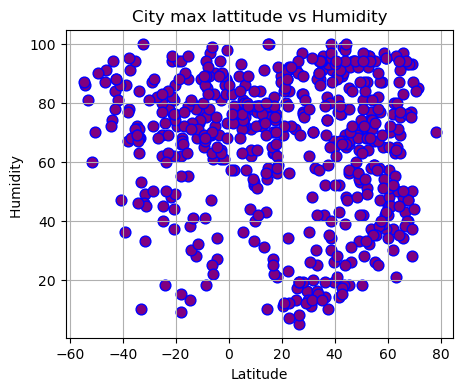

In [13]:
#Latitude vs.Humidity
city_df.plot.scatter(x="Lat",y="Humidity",xlabel="Latitude",ylabel="Humidity ",
                     title="City max lattitude vs Humidity",grid=True,c="purple",s=60,
                    edgecolors="blue",figsize=(5,4))

<Axes: title={'center': 'City max lattitude vs Cloudiness'}, xlabel='Latitude', ylabel='Cloudiness'>

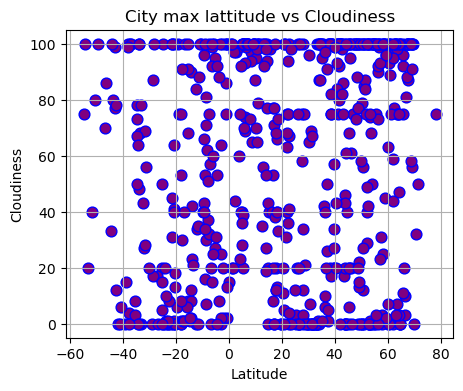

In [14]:
#Latitude vs. Cloudiness
city_df.plot.scatter(x="Lat",y="Cloudiness",xlabel="Latitude",ylabel="Cloudiness",
                     title="City max lattitude vs Cloudiness",grid=True,c="purple",s=60,
                    edgecolors="blue",figsize=(5,4))

<Axes: title={'center': 'City max lattitude vs Wind Speed'}, xlabel='Latitude', ylabel='Wind Speed'>

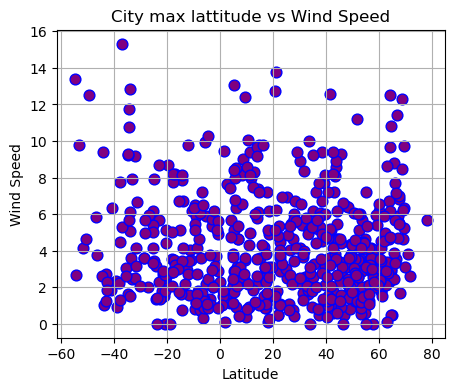

In [15]:
#latitude vs windspeed
city_df.plot.scatter(x="Lat",y="Wind Speed",xlabel="Latitude",ylabel="Wind Speed",
                     title="City max lattitude vs Wind Speed",grid=True,c="purple",s=60,
                    edgecolors="blue",figsize=(5,4))

In [16]:
northen_hemi_df=city_df.loc[city_df["Lat"]>=0,]
northen_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,277.35,80,77,4.92,CA,1686578888
1,ola,59.5833,151.2833,279.03,95,100,2.79,RU,1686578888
4,mariehamn,60.0973,19.9348,290.07,45,0,6.17,AX,1686578889
5,shenkursk,62.1091,42.8960,295.16,37,59,3.38,RU,1686578889
6,vorgashor,67.5833,63.9500,281.67,40,87,6.83,RU,1686578890
...,...,...,...,...,...,...,...,...,...
569,torbat-e jam,35.2440,60.6225,305.66,13,1,9.23,IR,1686579081
570,sciacca,37.5082,13.0881,300.18,59,5,7.68,IT,1686579081
571,miles city,46.4083,-105.8406,289.69,72,0,0.00,US,1686578972


The r-squared is: 0.498064410904344


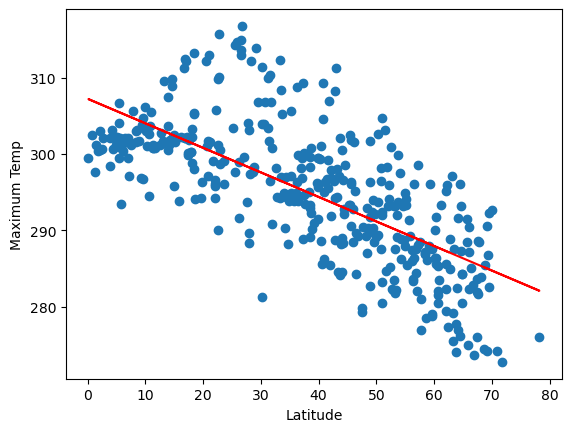

In [17]:
x_values=northen_hemi_df["Lat"]
y_values=northen_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temp")
plt.show()

In [18]:
southen_hemi_df=city_df.loc[city_df["Lat"]<0,]
southen_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,blackmans bay,-43.0167,147.3167,283.22,84,99,2.74,AU,1686578600
3,edinburgh of the seven seas,-37.0676,-12.3116,289.86,91,100,15.32,SH,1686578889
8,villa regina,-39.1000,-67.0667,280.35,36,0,2.34,AR,1686578891
9,adamstown,-25.0660,-130.1015,293.37,62,50,4.12,PN,1686578741
10,port alfred,-33.5906,26.8910,290.47,68,68,3.58,ZA,1686578795
...,...,...,...,...,...,...,...,...,...
538,urangan,-25.3000,152.9000,291.61,83,0,3.30,AU,1686579070
539,sena madureira,-9.0656,-68.6569,301.91,68,34,1.14,BR,1686579070
543,jardim,-21.4803,-56.1381,286.63,96,100,2.88,BR,1686578962


The r-squared is: 0.7395986035791502


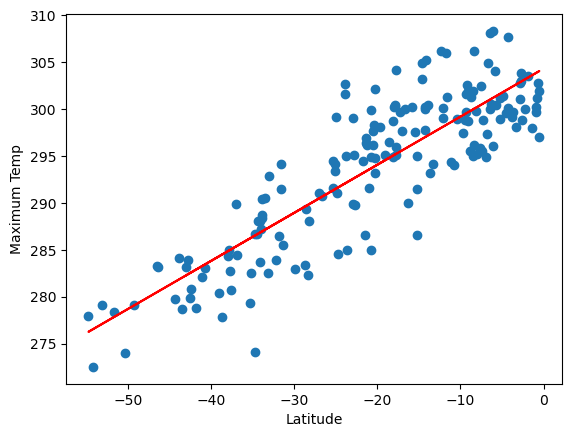

In [19]:
#Temp vs. Lattitude linera regression on southen hemisphere
x_values=southen_hemi_df["Lat"]
y_values=southen_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temp")
plt.show()

The r-squared is: 0.0040313214916973305


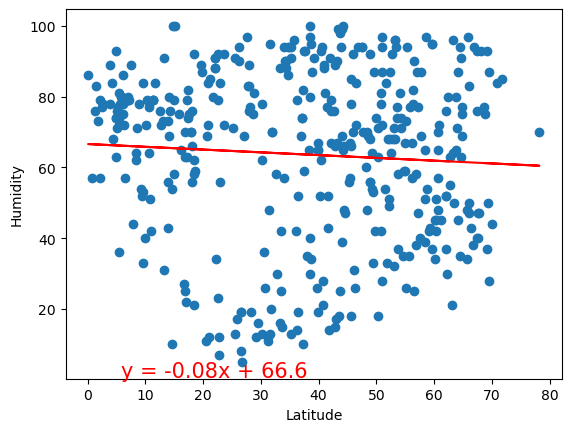

In [20]:
x_values=northen_hemi_df["Lat"]
y_values=northen_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-squared is: 0.0032688530058223855


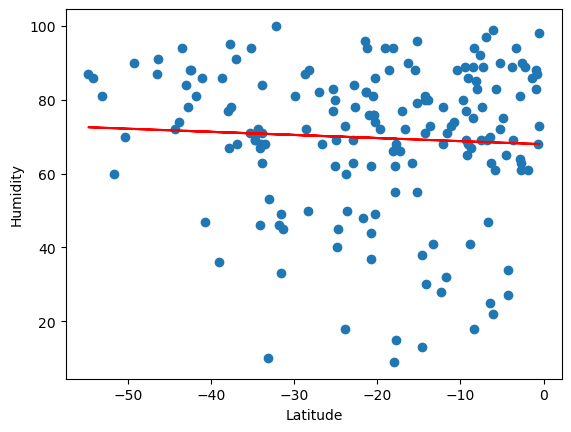

In [21]:
x_values=southen_hemi_df["Lat"]
y_values=southen_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-squared is: 5.009986128723087e-05


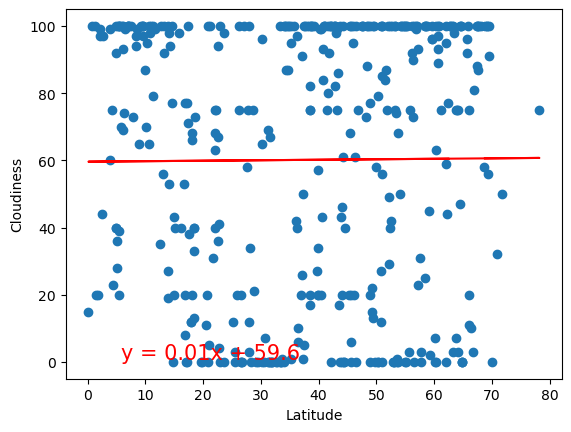

In [22]:
x_values=northen_hemi_df["Lat"]
y_values=northen_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-squared is: 4.4962304571021826e-05


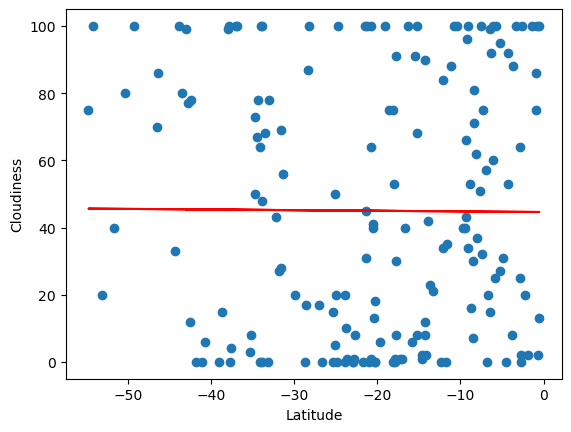

In [23]:
x_values=southen_hemi_df["Lat"]
y_values=southen_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-squared is: 0.00033516272909506895


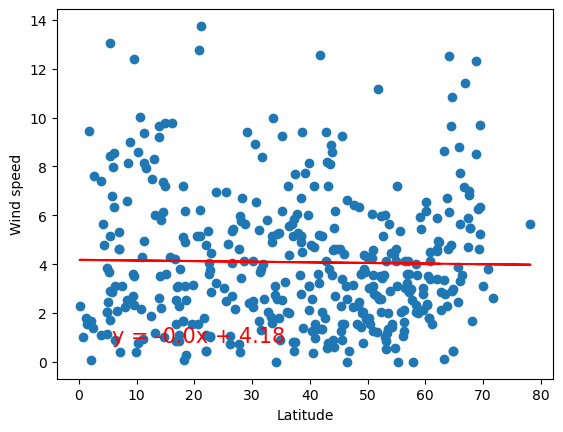

In [24]:
x_values=northen_hemi_df["Lat"]
y_values=northen_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")
plt.show()

The r-squared is: 0.05533825578067429


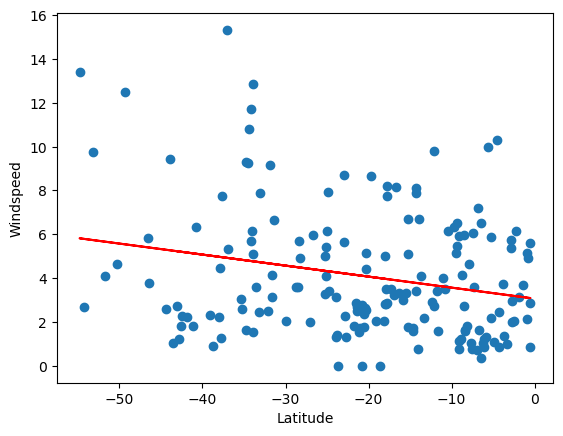

In [25]:
x_values=southen_hemi_df["Lat"]
y_values=southen_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.show()